# Initial exploratory analysis

## Provided Description

Dataset Description

You are provided with daily historical sales data. The task is to forecast the total amount of products sold in every shop for the test set. Note that the list of shops and products slightly changes every month. Creating a robust model that can handle such situations is part of the challenge.

File descriptions

1. sales_train.csv - the training set. Daily historical data from January 2013 to October 2015.
2. test.csv - the test set. **You need to forecast the sales for these shops and products for November 2015.**
3. sample_submission.csv - a sample submission file in the correct format.
4. items.csv - supplemental information about the items/products.
5. item_categories.csv - supplemental information about the items categories.
6. shops.csv- supplemental information about the shops.

Data fields

1. ID - an Id that represents a (Shop, Item) tuple within the test set
2. shop_id - unique identifier of a shop
3. item_id - unique identifier of a product
4. item_category_id - unique identifier of item category
5. item_cnt_day - number of products sold. **You are predicting a monthly amount of this measure**
6. item_price - current price of an item
7. date - date in format dd/mm/yyyy
8. date_block_num - a consecutive month number, used for convenience. January 2013 is 0, February 2013 is 1,..., October 2015 is 33
9. item_name - name of item
10. shop_name - name of shop
11. item_category_name - name of item category

This challenge serves as final project for the "How to win a data science competition" Coursera course.
https://www.coursera.org/learn/competitive-data-science/home/welcome

In this competition you will work with a challenging time-series dataset consisting of daily sales data, 
kindly provided by one of the largest Russian software firms - 1C Company. https://1c.ru/eng/title.htm

We are asking you to **predict total sales for every product and store in the next month.** By solving this competition you will be able to apply and enhance your data science skills.

## 1. Loading libraries and loading data into dataframes

In [219]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [220]:
# Copy data (competitive-data-science-final-project.zip) one level before the current directory
# and extract once. 
# Secondary extraction is done with pandas read_csv

In [221]:
# Dropping this table as it is as same as item_categories and not mentioned in the initial data description
# df_item_cats = pd.read_csv('competitive-data-science-final-project/item_cats.csv')

In [222]:
df_item_categories = pd.read_csv('../competitive-data-science-final-project/item_categories.csv')

In [223]:
df_items = pd.read_csv('../competitive-data-science-final-project/items.csv')

In [224]:
df_shops = pd.read_csv('../competitive-data-science-final-project/shops.csv')

In [225]:
df_train = pd.read_csv('../competitive-data-science-final-project/sales_train.csv.gz', compression='gzip')

In [226]:
df_test = pd.read_csv('../competitive-data-science-final-project/test.csv.gz', compression='gzip')

In [227]:
#df_item_categories.compare(df_item_cats)

## 2. Explore data 

In [228]:
def explore(df):
    summary_df = pd.DataFrame()
    
    for i in df.columns:
        line_df = pd.DataFrame([i, 
                                df[i].dtype, 
                                df[i].count(), 
                                df[i].min(), 
                                df[i].max(), 
                                df[i].nunique(), 
                                df[i].isna().sum()]
                              )
        summary_df = pd.concat([ summary_df,line_df], axis=1)
        #summary_df = summary_df.concat()
    summary_df.index = [ "Column_name","dtype", "Total", "Min", "Max", "nUnique", "Nullcount"]
    #Making the first row the column header
    summary_df.columns = summary_df.iloc[0]
    summary_df = summary_df[1:]
    
    return(summary_df)

In [229]:
explore(df_train)

Column_name,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
dtype,object,int64,int64,int64,float64,float64
Total,2935849,2935849,2935849,2935849,2935849,2935849
Min,01.01.2013,0,0,0,-1.0,-22.0
Max,31.12.2014,33,59,22169,307980.0,2169.0
nUnique,1034,34,60,21807,19993,198
Nullcount,0,0,0,0,0,0


In [230]:
explore(df_test)

Column_name,ID,shop_id,item_id
dtype,int64,int64,int64
Total,214200,214200,214200
Min,0,2,30
Max,214199,59,22167
nUnique,214200,42,5100
Nullcount,0,0,0


In [231]:
explore(df_item_categories)

Column_name,item_category_name,item_category_id
dtype,object,int64
Total,84,84
Min,PC - Гарнитуры/Наушники,0
Max,Элементы питания,83
nUnique,84,84
Nullcount,0,0


In [232]:
explore(df_items)

Column_name,item_name,item_id,item_category_id
dtype,object,int64,int64
Total,22170,22170,22170
Min,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,0
Max,Яйцо дракона (Игра престолов),22169,83
nUnique,22170,22170,84
Nullcount,0,0,0


In [233]:
explore(df_shops)

Column_name,shop_name,shop_id
dtype,object,int64
Total,60,60
Min,"!Якутск Орджоникидзе, 56 фран",0
Max,"Ярославль ТЦ ""Альтаир""",59
nUnique,60,60
Nullcount,0,0


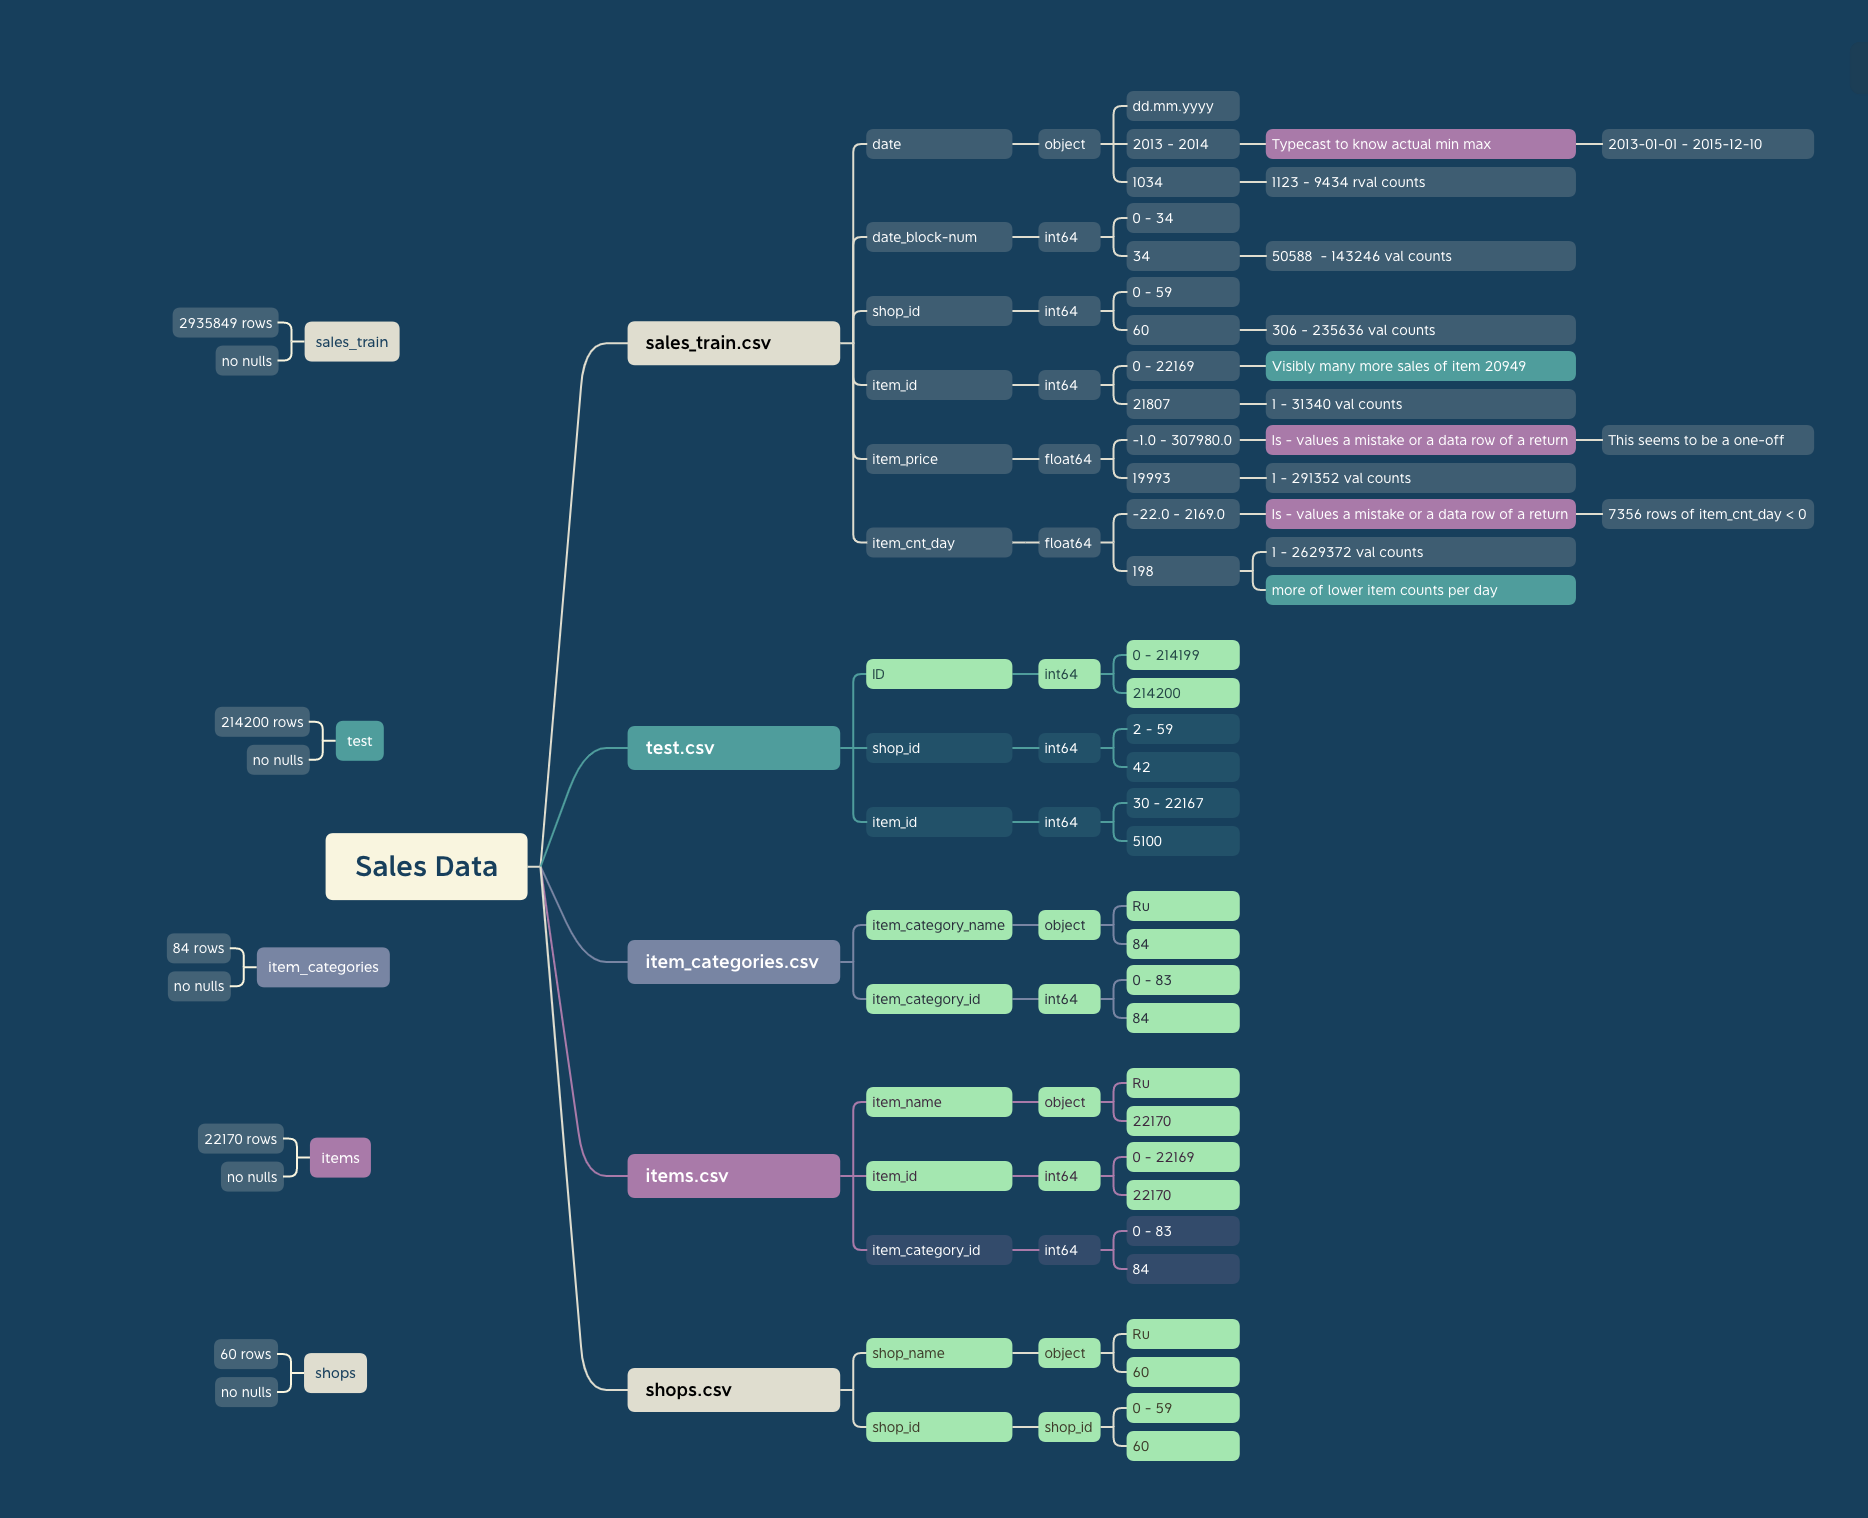

## 3. Exploring value counts distribution

In [234]:
def val_counts(df):
    for i in df.columns:
        print(df[i].value_counts(dropna=False))

In [235]:
val_counts(df_train)

date
28.12.2013    9434
29.12.2013    9335
30.12.2014    9324
30.12.2013    9138
31.12.2014    8347
              ... 
14.05.2015    1174
28.04.2015    1154
06.10.2015    1152
13.05.2015    1128
12.05.2015    1123
Name: count, Length: 1034, dtype: int64
date_block_num
11    143246
23    130786
2     121347
0     115690
1     108613
7     104772
6     100548
5     100403
12     99349
10     96736
8      96137
9      94202
3      94109
14     92733
4      91759
13     89830
24     88522
19     86614
22     86428
17     82408
21     79361
18     78760
16     78529
15     77906
20     73157
25     71808
26     69977
31     57029
27     56274
30     55549
29     54617
28     54548
33     53514
32     50588
Name: count, dtype: int64
shop_id
31    235636
25    186104
54    143480
28    142234
57    117428
42    109253
27    105366
6      82663
58     71441
56     69573
46     66321
50     65173
19     63911
15     59511
35     58445
21     58133
7      58076
47     56695
26     53910
18     5

In [236]:
val_counts(df_test)

ID
0         1
142765    1
142793    1
142794    1
142795    1
         ..
71403     1
71404     1
71405     1
71406     1
214199    1
Name: count, Length: 214200, dtype: int64
shop_id
5     5100
56    5100
53    5100
52    5100
47    5100
48    5100
57    5100
58    5100
59    5100
55    5100
36    5100
4     5100
37    5100
35    5100
38    5100
34    5100
46    5100
41    5100
44    5100
39    5100
49    5100
50    5100
42    5100
19    5100
6     5100
3     5100
2     5100
7     5100
10    5100
12    5100
28    5100
31    5100
26    5100
25    5100
22    5100
24    5100
21    5100
15    5100
16    5100
18    5100
14    5100
45    5100
Name: count, dtype: int64
item_id
5037     42
17184    42
15764    42
15760    42
15673    42
         ..
13397    42
14126    42
14064    42
14151    42
969      42
Name: count, Length: 5100, dtype: int64


* df_train has a unique ID
* ID consists of shop ID: item ID combination
* Since shop ID could have 1 or 2 digits without leading zeros and item id could have 1 to 5 digits without leading zeros,
using this column alone and trying to seperate later might cause issues. (Do not know where to split)
* Not all item IDs and Shop IDs are included in the testing dataset
* Each item_id has exactly 42 rows each and each shop_id has 5100 rows each

In [237]:
df_test.item_id.nunique()

5100

In [238]:
df_test.shop_id.nunique()

42

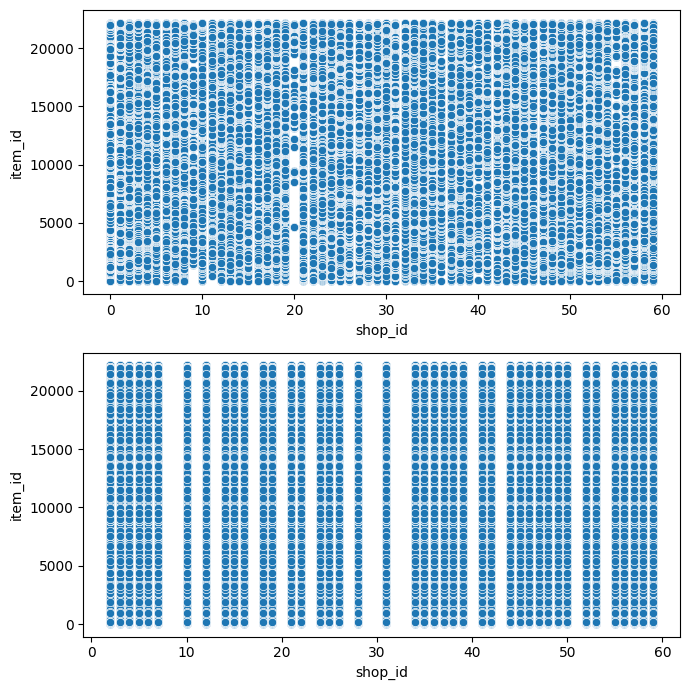

In [239]:
# Comparing the distribution of item_id vs shop_id in training and testing datasets
plt.rcParams["figure.figsize"] = [7.00, 7.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 1)

sns.scatterplot(data = df_train, x = "shop_id", y = "item_id", ax=axes[0])
sns.scatterplot(data = df_test, x = "shop_id", y = "item_id", ax=axes[1])

plt.show()

* Should we keep the data outside of the 5100 unique item_ids and 42 unique shop ID's used in the test dataset?

## 4. Exploring the number of negative values in item_price and item_cnt_day

In [240]:
df_train.loc[df_train.item_price < 0]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
484683,15.05.2013,4,32,2973,-1.0,1.0


In [241]:
df_train.loc[(df_train.item_id == 2973) & 
             (df_train.shop_id == 32) #& 
            # (df_train.date_block_num == 4)
            ]#.item_price.value_counts()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
67427,29.01.2013,0,32,2973,2499.0,1.0
67428,25.01.2013,0,32,2973,2499.0,1.0
67429,22.01.2013,0,32,2973,2499.0,1.0
67430,21.01.2013,0,32,2973,2499.0,1.0
67431,18.01.2013,0,32,2973,2499.0,1.0
67432,17.01.2013,0,32,2973,2499.0,1.0
67433,15.01.2013,0,32,2973,2499.0,3.0
187844,05.02.2013,1,32,2973,2499.0,1.0
187845,14.02.2013,1,32,2973,2499.0,1.0
484682,23.05.2013,4,32,2973,1249.0,1.0


In [242]:
df_train.loc[(df_train.item_id == 2973)].item_price.round(2).value_counts()

item_price
 2499.00    444
 1249.50    124
 1249.00     96
 1901.00     28
 2498.50     12
 1250.00     12
 1562.03     10
 1275.01      9
 2498.75      6
 1837.85      3
 1275.27      3
 1329.29      3
 1487.61      3
 1999.00      3
 1453.00      2
 2498.90      2
 1523.91      1
 1297.58      1
 1388.40      1
 1248.70      1
 1454.12      1
-1.00         1
 2248.80      1
 1049.00      1
 1248.90      1
 2427.57      1
 1249.10      1
 1998.40      1
 2498.40      1
 2498.70      1
 2373.95      1
 2249.00      1
 2498.88      1
 2498.92      1
 2498.83      1
 1832.37      1
Name: count, dtype: int64

* The minus value for item_price seems to be a one off. This could be adjusted/dropped
* If adjusted probably a mean value from the value distribution. If not significant, could be dropped.

In [243]:
df_train.loc[df_train.item_cnt_day < 0]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2,05.01.2013,0,25,2552,899.0,-1.0
148,23.01.2013,0,25,2321,999.0,-1.0
175,07.01.2013,0,25,2199,1449.0,-1.0
807,02.01.2013,0,25,2330,599.0,-1.0
1041,13.01.2013,0,25,5034,1989.0,-1.0
...,...,...,...,...,...,...
2934243,26.10.2015,33,25,3917,449.0,-1.0
2934462,18.10.2015,33,25,4896,6398.0,-1.0
2935263,05.10.2015,33,25,10039,249.0,-1.0
2935643,16.10.2015,33,25,7893,2990.0,-1.0


In [244]:
df_train.loc[df_train.item_cnt_day < 0].shop_id.value_counts()

shop_id
31    451
12    430
54    356
25    316
57    314
6     261
42    251
28    216
19    211
43    211
56    195
47    193
58    173
44    165
53    163
38    162
27    157
37    154
29    151
52    143
16    139
59    137
30    135
26    134
18    132
50    130
15    130
35    128
21    125
4     124
14    120
3     119
24    103
45    103
46    102
7      99
22     97
48     89
5      85
41     82
2      80
17     80
49     42
39     37
32     34
34     25
33     22
23     17
40     13
9       8
8       6
36      3
55      2
20      1
Name: count, dtype: int64

There seems to be many more minus values in terms of item_cnt_day. This could be considered as returns and kept.

## 5. Typecasting the date column, inplace

In [245]:
df_train['date']= pd.to_datetime(df_train['date'], dayfirst=True)

In [246]:
df_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.00,1.0
1,2013-01-03,0,25,2552,899.00,1.0
2,2013-01-05,0,25,2552,899.00,-1.0
3,2013-01-06,0,25,2554,1709.05,1.0
4,2013-01-15,0,25,2555,1099.00,1.0


In [247]:
df_train.date.min()

Timestamp('2013-01-01 00:00:00')

In [248]:
df_train.date.max()

Timestamp('2015-10-31 00:00:00')

## 6.  Validating date_block_num column

In [249]:
# Adding a Month_Year column to validate the date_block_num column numbers

In [250]:
df_train['Month_Year'] = df_train['date'].dt.to_period('M')
df_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,Month_Year
0,2013-01-02,0,59,22154,999.00,1.0,2013-01
1,2013-01-03,0,25,2552,899.00,1.0,2013-01
2,2013-01-05,0,25,2552,899.00,-1.0,2013-01
3,2013-01-06,0,25,2554,1709.05,1.0,2013-01
4,2013-01-15,0,25,2555,1099.00,1.0,2013-01


In [251]:
df_train.groupby(
    ["Month_Year", "date_block_num"]
)[["date_block_num"]].count()

,,date_block_num
Month_Year,date_block_num,
2013-01,0,115690
2013-02,1,108613
2013-03,2,121347
2013-04,3,94109
2013-05,4,91759
2013-06,5,100403
2013-07,6,100548
2013-08,7,104772
2013-09,8,96137


In [252]:
df_train.groupby(
    ["Month_Year", "date_block_num"]
)[["date_block_num"]].count().date_block_num.value_counts().nunique()

1

* There is only one unique date_block_num for each unique Month_Year.
* The date_block_num is in proper order with time

## 7.  Validating item_cnt_day column

In [253]:
df_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,Month_Year
0,2013-01-02,0,59,22154,999.00,1.0,2013-01
1,2013-01-03,0,25,2552,899.00,1.0,2013-01
2,2013-01-05,0,25,2552,899.00,-1.0,2013-01
3,2013-01-06,0,25,2554,1709.05,1.0,2013-01
4,2013-01-15,0,25,2555,1099.00,1.0,2013-01


In [254]:
# checking whether rows are unique for date, shop_id and item_id together

In [255]:
df_train.groupby(["date","shop_id","item_id"])[["item_cnt_day"]].count().item_cnt_day.value_counts()

item_cnt_day
1    2935793
2         28
Name: count, dtype: int64

* There are 28 occurences of where more than 2 rows of item_cnt_day exist for a row consisting of same date,shop_idand item_id

* All the other occurences are unique for these three columns in combination

In [256]:
df_train.groupby(["date","shop_id","item_id", "item_price"])[["item_cnt_day"]].count().item_cnt_day.value_counts()

item_cnt_day
1    2935837
2          6
Name: count, dtype: int64

* Most of these repeats are due to varying item_price. One item could have multiple prices for the same date, shop_id and item_id combination.

* There are only 6 duplicates when considering date, shop_id, item_id and item_price


In [257]:
df_train.loc[df_train.duplicated(subset=["date", "shop_id","item_id", "item_price"])].sort_values(["date", "shop_id","item_id"],
              ascending = True)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,Month_Year
76962,2013-01-05,0,54,20130,149.0,1.0,2013-01
1435367,2014-02-23,13,50,3423,999.0,1.0,2014-02
1496766,2014-03-23,14,21,3423,999.0,1.0,2014-03
1671873,2014-05-01,16,50,3423,999.0,1.0,2014-05
1866340,2014-07-12,18,25,3423,999.0,1.0,2014-07
2198566,2014-12-31,23,42,21619,499.0,1.0,2014-12


## 8. Exploring duplicates

In [258]:
df_train.loc[df_train.duplicated(subset=None)].sort_values(["date", "shop_id","item_id"],
              ascending = True)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,Month_Year
76962,2013-01-05,0,54,20130,149.0,1.0,2013-01
1435367,2014-02-23,13,50,3423,999.0,1.0,2014-02
1496766,2014-03-23,14,21,3423,999.0,1.0,2014-03
1671873,2014-05-01,16,50,3423,999.0,1.0,2014-05
1866340,2014-07-12,18,25,3423,999.0,1.0,2014-07
2198566,2014-12-31,23,42,21619,499.0,1.0,2014-12


In [259]:
df_train.loc[df_train.duplicated(subset=["date", "shop_id","item_id", "item_price", "item_cnt_day"])].sort_values(["date", "shop_id","item_id"],
              ascending = True)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,Month_Year
76962,2013-01-05,0,54,20130,149.0,1.0,2013-01
1435367,2014-02-23,13,50,3423,999.0,1.0,2014-02
1496766,2014-03-23,14,21,3423,999.0,1.0,2014-03
1671873,2014-05-01,16,50,3423,999.0,1.0,2014-05
1866340,2014-07-12,18,25,3423,999.0,1.0,2014-07
2198566,2014-12-31,23,42,21619,499.0,1.0,2014-12


In [260]:
df_train.loc[
    (df_train["date"] == "2013-01-05") & 
    (df_train["shop_id"] == 54) & 
    (df_train["item_id"] == 20130)]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,Month_Year
76961,2013-01-05,0,54,20130,149.0,1.0,2013-01
76962,2013-01-05,0,54,20130,149.0,1.0,2013-01


* We can remove these 6 duplicates

## 9. Exploring the item categories in Training data and testing data

In [261]:
# Training data

In [262]:
df_train_cats = df_train.join(df_items, 
                              on="item_id", 
                              how='left', rsuffix = "_ITEMS_")
df_train_cats.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,Month_Year,item_name,item_id_ITEMS_,item_category_id
0,2013-01-02,0,59,22154,999.00,1.0,2013-01,ЯВЛЕНИЕ 2012 (BD),22154,37
1,2013-01-03,0,25,2552,899.00,1.0,2013-01,DEEP PURPLE The House Of Blue Light LP,2552,58
2,2013-01-05,0,25,2552,899.00,-1.0,2013-01,DEEP PURPLE The House Of Blue Light LP,2552,58
3,2013-01-06,0,25,2554,1709.05,1.0,2013-01,DEEP PURPLE Who Do You Think We Are LP,2554,58
4,2013-01-15,0,25,2555,1099.00,1.0,2013-01,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),2555,56


In [263]:
df_train_cats.groupby(["item_category_id",])[["item_id"]].count().reset_index().item_category_id.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83])

In [264]:
item_cats_train = df_train_cats.groupby(["item_category_id",])[["item_id"]].count().reset_index().item_category_id.unique()

In [265]:
len(item_cats_train)

84

* Training dataset includes items from all 84 item categories

In [266]:
# Testing data

In [267]:
df_test_cats = df_test.join(df_items, 
                              on="item_id", 
                              how='left', rsuffix = "_ITEMS_")
df_test_cats.head()

,ID,shop_id,item_id,item_name,item_id_ITEMS_,item_category_id
0,0,5,5037,"NHL 15 [PS3, русские субтитры]",5037,19
1,1,5,5320,ONE DIRECTION Made In The A.M.,5320,55
2,2,5,5233,"Need for Speed Rivals (Essentials) [PS3, русск...",5233,19
3,3,5,5232,"Need for Speed Rivals (Classics) [Xbox 360, ру...",5232,23
4,4,5,5268,"Need for Speed [PS4, русская версия]",5268,20


In [268]:
df_test_cats.groupby(["item_category_id",])[["item_id"]].count().reset_index().item_category_id.unique()

array([ 0,  2,  3,  5,  6,  7,  9, 11, 12, 15, 16, 19, 20, 21, 22, 23, 24,
       25, 26, 27, 28, 29, 30, 31, 33, 34, 35, 36, 37, 38, 40, 41, 42, 43,
       44, 45, 47, 49, 54, 55, 56, 57, 58, 60, 61, 62, 63, 64, 65, 67, 69,
       70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 83])

In [269]:
item_cats_test = df_test_cats.groupby(["item_category_id",])[["item_id"]].count().reset_index().item_category_id.unique()

In [270]:
len(item_cats_test)

62

* The testing dataset only include items from 62 item categories

## 10. Exploring Seasonality

In [271]:
df_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,Month_Year
0,2013-01-02,0,59,22154,999.00,1.0,2013-01
1,2013-01-03,0,25,2552,899.00,1.0,2013-01
2,2013-01-05,0,25,2552,899.00,-1.0,2013-01
3,2013-01-06,0,25,2554,1709.05,1.0,2013-01
4,2013-01-15,0,25,2555,1099.00,1.0,2013-01


In [272]:
df_train["Year"] = df_train["date"].dt.year 
df_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,Month_Year,Year
0,2013-01-02,0,59,22154,999.00,1.0,2013-01,2013
1,2013-01-03,0,25,2552,899.00,1.0,2013-01,2013
2,2013-01-05,0,25,2552,899.00,-1.0,2013-01,2013
3,2013-01-06,0,25,2554,1709.05,1.0,2013-01,2013
4,2013-01-15,0,25,2555,1099.00,1.0,2013-01,2013


In [273]:
df_train["Month"] = df_train["date"].dt.month
df_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,Month_Year,Year,Month
0,2013-01-02,0,59,22154,999.00,1.0,2013-01,2013,1
1,2013-01-03,0,25,2552,899.00,1.0,2013-01,2013,1
2,2013-01-05,0,25,2552,899.00,-1.0,2013-01,2013,1
3,2013-01-06,0,25,2554,1709.05,1.0,2013-01,2013,1
4,2013-01-15,0,25,2555,1099.00,1.0,2013-01,2013,1


In [274]:
df_train["DoW"] = df_train["date"].dt.dayofweek
df_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,Month_Year,Year,Month,DoW
0,2013-01-02,0,59,22154,999.00,1.0,2013-01,2013,1,2
1,2013-01-03,0,25,2552,899.00,1.0,2013-01,2013,1,3
2,2013-01-05,0,25,2552,899.00,-1.0,2013-01,2013,1,5
3,2013-01-06,0,25,2554,1709.05,1.0,2013-01,2013,1,6
4,2013-01-15,0,25,2555,1099.00,1.0,2013-01,2013,1,1


In [275]:
## 4. Merge rows with different item price for same item to get one item_count

In [276]:
df_train = df_train.groupby(
    ["date", 
     "date_block_num", 
     "shop_id", 
     "item_id", 
     "Month_Year", 
     "Year", 
     "Month", 
     "DoW"]
)[["item_cnt_day"]].sum().reset_index()

In [277]:
df_train.head()

,date,date_block_num,shop_id,item_id,Month_Year,Year,Month,DoW,item_cnt_day
0,2013-01-01,0,2,991,2013-01,2013,1,1,1.0
1,2013-01-01,0,2,1472,2013-01,2013,1,1,1.0
2,2013-01-01,0,2,1905,2013-01,2013,1,1,1.0
3,2013-01-01,0,2,2920,2013-01,2013,1,1,2.0
4,2013-01-01,0,2,3320,2013-01,2013,1,1,1.0


### 1. item count by month

In [278]:
items_by_month = df_train.groupby(
    ["Month","Year","date_block_num"])[["item_cnt_day"]].agg(
    ["sum", "mean"]).reset_index()

In [279]:
items_by_month.head()

Month  Year date_block_num item_cnt_day          
                                      sum      mean
0     1  2013              0     131479.0  1.136516
1     1  2014             12     116899.0  1.176650
2     1  2015             24     110971.0  1.253598
3     2  2013              1     128090.0  1.179346
4     2  2014             13     109687.0  1.221064

In [280]:
items_by_month.columns

MultiIndex([(         'Month',     ''),
            (          'Year',     ''),
            ('date_block_num',     ''),
            (  'item_cnt_day',  'sum'),
            (  'item_cnt_day', 'mean')],
           )

In [281]:
items_by_month.columns = [''.join(col) for col in items_by_month.columns.values]

In [282]:
items_by_month.head()

,Month,Year,date_block_num,item_cnt_daysum,item_cnt_daymean
0,1,2013,0,131479.0,1.136516
1,1,2014,12,116899.0,1.176650
2,1,2015,24,110971.0,1.253598
3,2,2013,1,128090.0,1.179346
4,2,2014,13,109687.0,1.221064


[Text(0.5, 1.0, 'Total item count by month - by year'),
 Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'Total item count')]

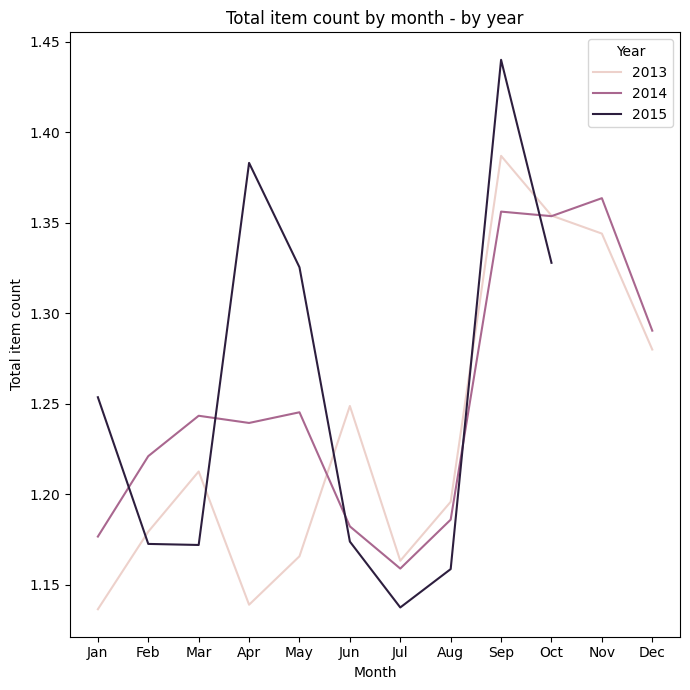

In [333]:
ax = sns.lineplot(data = items_by_month, 
             x = "Month",
             y = "item_cnt_daymean", 
             hue = "Year",
             errorbar=None)
ax.set_xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
ax.set_xticklabels(labels = [ "Jan", 
                             "Feb", 
                             "Mar", 
                             "Apr", 
                             "May", 
                             "Jun", 
                             "Jul",
                             "Aug",
                             "Sep",
                             "Oct",
                             "Nov",
                             "Dec"])
ax.set(title = "Mean item count by month - by year",
      xlabel = "Month",
      ylabel = "Mean item count")

[Text(0.5, 1.0, 'Total item count by month - by year'),
 Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'Total item count')]

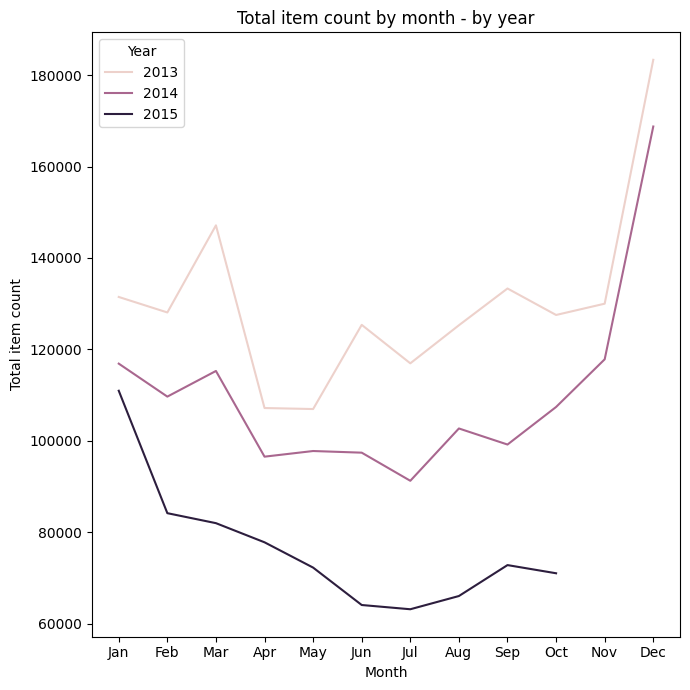

In [335]:
ax = sns.lineplot(data = items_by_month, 
             x = "Month", 
             y = "item_cnt_daysum", 
             hue = "Year",
             errorbar=None)
ax.set_xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
ax.set_xticklabels(labels = [ "Jan", 
                             "Feb", 
                             "Mar", 
                             "Apr", 
                             "May", 
                             "Jun", 
                             "Jul",
                             "Aug",
                             "Sep",
                             "Oct",
                             "Nov",
                             "Dec"])
ax.set(title = "Total item count by month - by year",
      xlabel = "Month",
      ylabel = "Total item count")

[Text(0.5, 1.0, 'Total item count by month - All time'),
 Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'Total item count')]

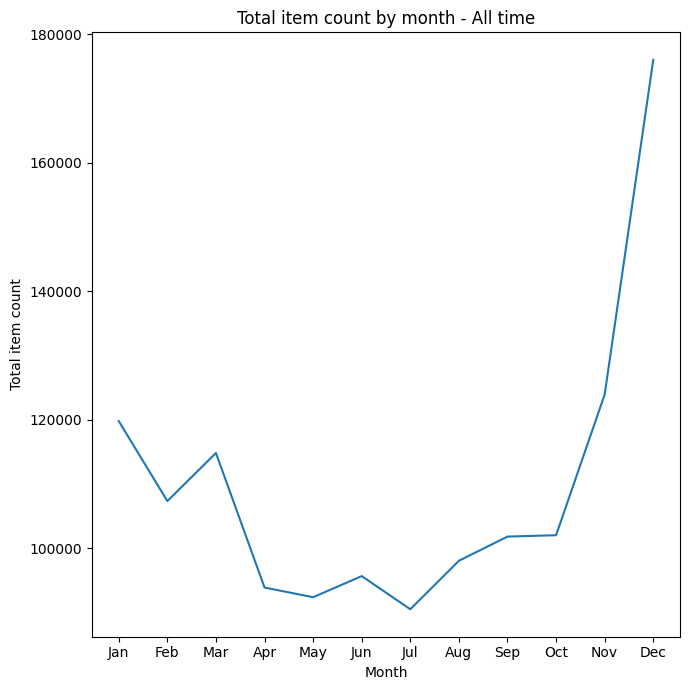

In [330]:
ax = sns.lineplot(data = items_by_month, 
             x = "Month", 
             y = "item_cnt_daysum",
             errorbar=None)
ax.set_xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
ax.set_xticklabels(labels = [ "Jan", 
                             "Feb", 
                             "Mar", 
                             "Apr", 
                             "May", 
                             "Jun", 
                             "Jul",
                             "Aug",
                             "Sep",
                             "Oct",
                             "Nov",
                             "Dec"])
ax.set(title = "Total item count by month - All time",
      xlabel = "Month",
      ylabel = "Total item count")

* December has the highest total item count sales. There is a sharp increase from November to December

In [285]:
### 2. item count by day of week

In [286]:
items_by_dow = df_train.groupby(
    ["DoW","Year","Month"])[["item_cnt_day"]].agg(
    ["sum", "mean"]).reset_index()

In [287]:
items_by_dow.columns = [''.join(col) for col in items_by_dow.columns.values]

In [288]:
items_by_dow.head()

,DoW,Year,Month,item_cnt_daysum,item_cnt_daymean
0,0,2013,1,13067.0,1.101121
1,0,2013,2,11971.0,1.134800
2,0,2013,3,12193.0,1.147576
3,0,2013,4,12858.0,1.100573
4,0,2013,5,10060.0,1.118648


[Text(0.5, 1.0, 'Mean item count by day of week'),
 Text(0.5, 0, 'Day of Week'),
 Text(0, 0.5, 'Mean item count')]

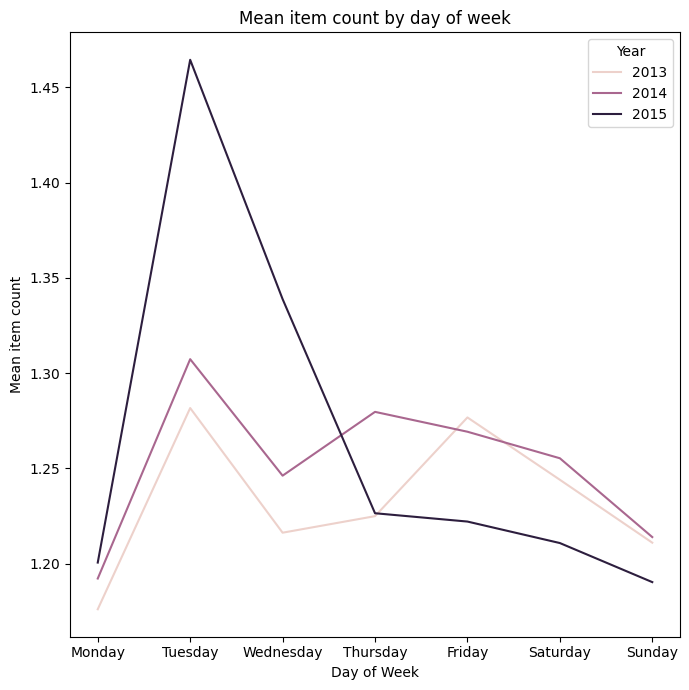

In [321]:
ax = sns.lineplot(data = items_by_dow, 
             x = "DoW", 
             y = "item_cnt_daymean", 
             hue = "Year", 
             errorbar=None,)
ax.set_xticks([0, 1, 2, 3, 4, 5, 6])
ax.set_xticklabels(labels = [ "Monday", 
                             "Tuesday", 
                             "Wednesday", 
                             "Thursday", 
                             "Friday", 
                             "Saturday", 
                             "Sunday"])
ax.set(title = "Mean item count by day of week",
      xlabel = "Day of Week",
      ylabel = "Mean item count")

[Text(0.5, 1.0, 'Total item count by day of week for each year'),
 Text(0.5, 0, 'Day of Week'),
 Text(0, 0.5, 'Total item count')]

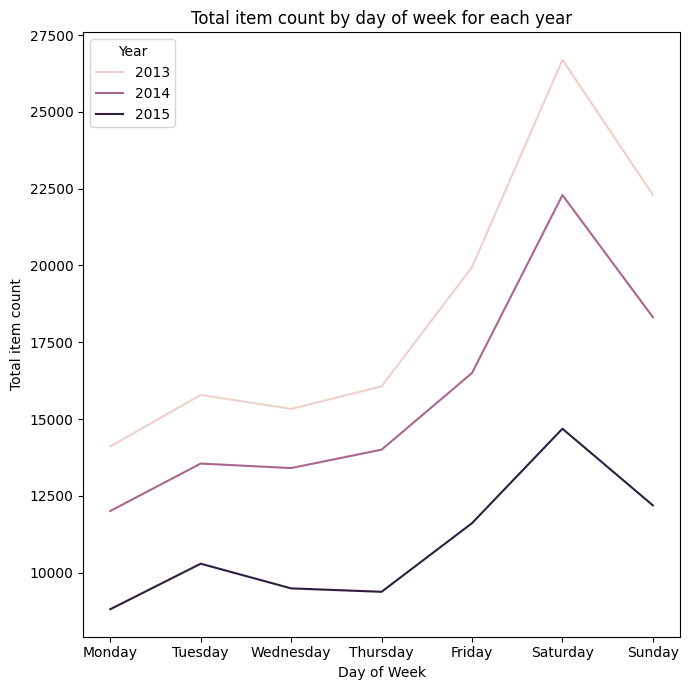

In [325]:
ax = sns.lineplot(data = items_by_dow, 
             x = "DoW", 
             y = "item_cnt_daysum", 
             hue = "Year", 
             errorbar=None,)
ax.set_xticks([0, 1, 2, 3, 4, 5, 6])
ax.set_xticklabels(labels = [ "Monday", 
                             "Tuesday", 
                             "Wednesday", 
                             "Thursday", 
                             "Friday", 
                             "Saturday", 
                             "Sunday"])
ax.set(title = "Total item count by day of week for each year",
      xlabel = "Day of Week",
      ylabel = "Total item count")


[Text(0.5, 1.0, 'Total item count by day of week - all time'),
 Text(0.5, 0, 'Day of Week'),
 Text(0, 0.5, 'Total item count')]

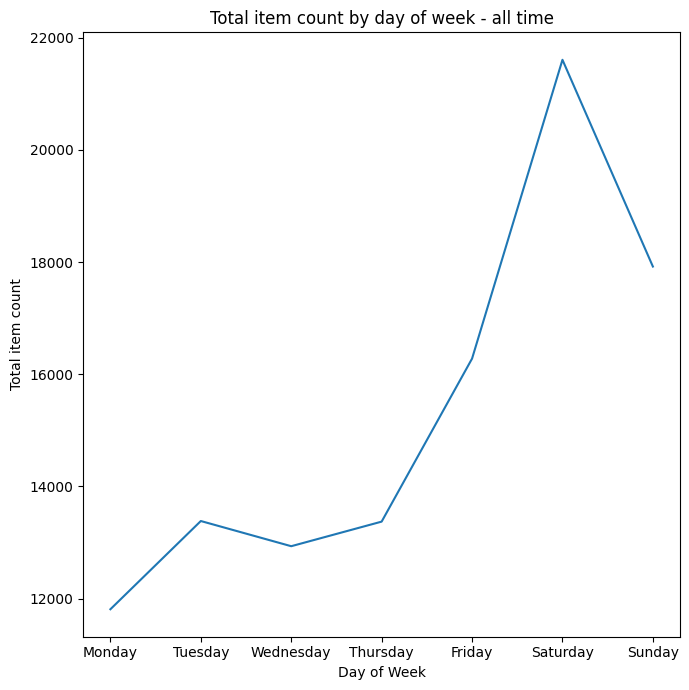

In [326]:
ax = sns.lineplot(data = items_by_dow, 
             x = "DoW", 
             y = "item_cnt_daysum", 
             #hue = "Year", 
             errorbar=None,)
ax.set_xticks([0, 1, 2, 3, 4, 5, 6])
ax.set_xticklabels(labels = [ "Monday", 
                             "Tuesday", 
                             "Wednesday", 
                             "Thursday", 
                             "Friday", 
                             "Saturday", 
                             "Sunday"])
ax.set(title = "Total item count by day of week - all time",
      xlabel = "Day of Week",
      ylabel = "Total item count")

* There is a slight increase from Monday to Tuesday. 
* From Thursday to Saturday the total number of sales keep increasing.
* Saturday has the highest total item count sales.
* There is a sharp decrease of total sales count on sunday, but it does not decrease as low as monday.

# Conclusion

* Update the item_price = - 1.0 cell to the mean price of that item. Or drop.

* Type cast date column

* Add Year_Month column. maybe? And week of year and day of week column. maybe ??

* Remove the 6 duplicates in the df_train 

* Merge rows with different item price for same item to get one item_count?

* Remove the current ID column in the df_test and if required maybe add a column with a delimiter so it can later be constructed/deconstructed/identified against shop_id and item_id.

* Maybe add item category ID column to both testing and training datasets?

* Do we need to keep items from the category IDs not present in the testing dataset? 